In [1]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("SparkTest") \
    .getOrCreate()


In [2]:
spark

In [3]:
#load and join data
dfLC = spark.read.csv("loan.csv", inferSchema = True, header = True)
dfLC = dfLC.withColumn("zip_code_3", dfLC.zip_code.substr(1,3))

dfZ = spark.read.csv("Zip_Zhvi_AllHomes.csv", inferSchema = True, header = True)
dfZ = dfZ.withColumn("zip_code_3_throwaway", dfZ.RegionName.substr(1,3)) 
dfZ = dfZ.select([c for c in dfZ.columns if c not in {'id','member_id','zip_code','RegionName','RegionID','City','State','Metro','CountyName','SizeRank','1996-04','1996-05','1996-06','1996-07','1996-08','1996-09','1996-10','1996-11','1996-12','1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12','1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12','1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12','2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12','2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12','2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12','2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12','2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12','2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12','2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12','2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12','2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12','2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12','2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12','2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02'}]) \
           .withColumn("IndexValue", dfZ["2019-03"]) \
           .groupBy("zip_code_3_throwaway").mean('IndexValue').collect()
dfZ = spark.createDataFrame(data = dfZ, schema = ['zip_code_3_throwaway', 'IndexValueMean'])


In [4]:
from pyspark.sql.functions import substring
data = dfLC.join(dfZ, dfLC.zip_code_3 == dfZ.zip_code_3_throwaway).select(dfLC["*"],dfZ["*"])
data = data.select([c for c in data.columns if c not in {'id','member_id','zip_code','verification_status_joint','acc_now_delinq','hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term','hardship_flag','policy_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','zip_code_3_throwaway','desc','loan_status','pymnt_plan','url','int_rate','installment','grade','sub_grade'}]) \
           .withColumn("funded_ratio", data.funded_amnt_inv / data.loan_amnt)
data = data.withColumn('issue_year', substring('issue_d', 5, 7))


In [5]:
#EDA: find funded ratio and counts for each year
from pyspark.ml.feature import QuantileDiscretizer

data_orig = data
discretizer = QuantileDiscretizer(numBuckets=2, inputCol="funded_ratio", outputCol="funded_ratio_category")
data_orig = discretizer.fit(data_orig).transform(data_orig) \
                       .groupBy(['issue_year','funded_ratio_category']).count().toPandas()


In [6]:
data_orig

,issue_year,funded_ratio_category,count
0,2007,0.0,482
1,2007,1.0,1
2,2008,0.0,2080
3,2018,1.0,435713
4,2017,0.0,12603
5,2013,0.0,17990
6,2015,0.0,29147
7,2009,1.0,1036
8,2014,0.0,15713
9,2013,1.0,105036


In [5]:
#define function for ohe hot encoding a field
from pyspark.ml.feature import CountVectorizer
from pyspark.sql.functions import col, split, lit

def oheField(dataSet, fieldNameToEncode, suffixToAppend, aVocabSize):
    arrayFieldName = fieldNameToEncode+"_array"
    oheFieldName = fieldNameToEncode+"_ohe"
    termVectorizer = CountVectorizer(inputCol=arrayFieldName, outputCol=oheFieldName, vocabSize=aVocabSize, minDF=1.0)
    aData = dataSet.withColumn(fieldNameToEncode, concat(col(fieldNameToEncode), lit(suffixToAppend))) \
                   .withColumn(arrayFieldName, split(col(fieldNameToEncode)," "))
    data_ohe = termVectorizer.fit(aData).transform(aData)
    return data_ohe.select([c for c in data_ohe.columns if c not in {arrayFieldName,fieldNameToEncode}])


In [6]:
#clean and OHE emp_title
from pyspark.sql.functions import lower, col
from pyspark.sql.functions import concat
data = data.withColumn('emp_title', lower(col('emp_title')))
from pyspark.sql.functions import when, col, coalesce, array
fill = ""
data = data.withColumn('emp_title_filled', when(col("emp_title").isNull(), fill).otherwise(col("emp_title")))
data = data.select([c for c in data.columns if c not in {'emp_title'}])
data = oheField(data, "emp_title_filled", "", 3)

#clean employment length
from pyspark.sql.functions import *
fill0 = "0 years"
fill10 = "10 years"
data = data.withColumn('emp_length', when(col("emp_length")=='n/a', fill0).otherwise(col("emp_length")))
data = data.withColumn('emp_length', when(col("emp_length")=='< 1 year', fill0).otherwise(col("emp_length"))) 
data = data.withColumn('emp_length', when(col("emp_length")=='10+ years', fill10).otherwise(col("emp_length"))) 
data = data.withColumn('emp_length', regexp_replace('emp_length', ' years', '')) 
data = data.withColumn('emp_length', regexp_replace('emp_length', ' year', '')) 
data = data.withColumn("emp_length", data["emp_length"].cast("integer"))

#OHE more fields
data = oheField(data, "term", "", 3)
data = oheField(data, "home_ownership", "", 4) 
data = oheField(data, "verification_status", "", 4)
data = oheField(data, "purpose", "", 4)
data = oheField(data, "addr_state"," State",4)
data = oheField(data, "zip_code_3", " zip", 3)

#clean and OHE title
fill = "no title"
data = data.withColumn('title', when(col("title").isNull(), fill).otherwise(col("title")))
data = oheField(data, "title", "", 4)
data = oheField(data, "application_type"," application", 4)

#convert datestamp earliest_cr_line
fill = "May-2019"
data = data.withColumn('earliest_cr_line', when(col("earliest_cr_line").isNull(), fill).otherwise(col("earliest_cr_line")))
data = data.withColumn('earliest_cr_line', unix_timestamp('earliest_cr_line', 'MMM-yyy').alias('earliest_cr_line_date'))
data = data.withColumn('issue_d', unix_timestamp('issue_d', 'MMM-yyy').alias('issue_d'))

#convert datestamp initial_list_state
fill = "unknown"
data = data.withColumn('initial_list_status', when(col("initial_list_status").isNull(), fill).otherwise(col("initial_list_status")))
data = oheField(data, "initial_list_status", " state", 4)
data = data.withColumn('last_credit_pull_d', unix_timestamp('last_credit_pull_d', 'MMM-yyy').alias('last_credit_pull_d_date'))

#clean and OHE disbursement_method
fill = "unknown"
data = data.withColumn('disbursement_method', when(col("disbursement_method").isNull(), fill).otherwise(col("disbursement_method")))
data = oheField(data, "disbursement_method"," method", 10)

#convert datestamp sec_app_earliest_cr_line
data = data.withColumn('sec_app_earliest_cr_line', unix_timestamp('sec_app_earliest_cr_line', 'MMM-yyy').alias('sec_app_earliest_cr_line'))


In [7]:
#convert the data types on a group of fields
data = data.withColumn("annual_inc", data["annual_inc"].cast("integer")) \
  .withColumn("dti", data["dti"].cast("double")) \
  .withColumn("delinq_2yrs", data["delinq_2yrs"].cast("integer")) \
  .withColumn("inq_last_6mths", data["inq_last_6mths"].cast("integer")) \
  .withColumn("mths_since_last_delinq", data["mths_since_last_delinq"].cast("integer")) \
  .withColumn("mths_since_last_record", data["mths_since_last_record"].cast("integer")) \
  .withColumn("open_acc", data["open_acc"].cast("integer")) \
  .withColumn("pub_rec", data["pub_rec"].cast("integer")) \
  .withColumn("revol_bal", data["revol_bal"].cast("integer")) \
  .withColumn("revol_util", data["revol_util"].cast("integer")) \
  .withColumn("total_acc", data["total_acc"].cast("integer")) \
  .withColumn("collections_12_mths_ex_med", data["collections_12_mths_ex_med"].cast("integer")) \
  .withColumn("mths_since_last_major_derog", data["mths_since_last_major_derog"].cast("integer")) \
  .withColumn("annual_inc_joint", data["annual_inc_joint"].cast("integer")) \
  .withColumn("dti_joint", data["dti_joint"].cast("double")) \
  .withColumn("tot_coll_amt", data["tot_coll_amt"].cast("integer")) \
  .withColumn("tot_cur_bal", data["tot_cur_bal"].cast("integer")) \
  .withColumn("open_acc_6m", data["open_acc_6m"].cast("integer")) \
  .withColumn("open_act_il", data["open_act_il"].cast("integer")) \
  .withColumn("open_il_12m", data["open_il_12m"].cast("integer")) \
  .withColumn("open_il_24m", data["open_il_24m"].cast("integer")) \
  .withColumn("mths_since_rcnt_il", data["mths_since_rcnt_il"].cast("integer")) \
  .withColumn("total_bal_il", data["total_bal_il"].cast("integer")) \
  .withColumn("il_util", data["il_util"].cast("integer")) \
  .withColumn("open_rv_12m", data["open_rv_12m"].cast("integer")) \
  .withColumn("open_rv_24m", data["open_rv_24m"].cast("integer")) \
  .withColumn("max_bal_bc", data["max_bal_bc"].cast("integer")) \
  .withColumn("all_util", data["all_util"].cast("integer")) \
  .withColumn("total_rev_hi_lim", data["total_rev_hi_lim"].cast("integer")) \
  .withColumn("inq_fi", data["inq_fi"].cast("integer")) \
  .withColumn("total_cu_tl", data["total_cu_tl"].cast("integer")) \
  .withColumn("inq_last_12m", data["inq_last_12m"].cast("integer")) \
  .withColumn("avg_cur_bal", data["avg_cur_bal"].cast("integer")) \
  .withColumn("bc_util", data["bc_util"].cast("integer"))


In [9]:
data = data.select([c for c in data.columns if c not in {'funded_amnt','funded_amnt_inv'}])


In [10]:
################### Random Forest

In [10]:
import pandas as pd
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import OneHotEncoderEstimator, VectorAssembler, IndexToString, StringIndexer, VectorIndexer, QuantileDiscretizer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator 
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics
from pyspark.sql.functions import isnan, when, count, col
dataRF = data
dataRF = dataRF.na.fill(0)

In [11]:
cols = dataRF.columns
cols.remove("funded_ratio")
cols.remove("issue_year")
#import vector assembler
assembler = VectorAssembler(inputCols=cols,outputCol="features")
#transform data
dataRF = assembler.transform(dataRF)


In [12]:
#Yes/No
discretizer = QuantileDiscretizer(numBuckets=2, inputCol="funded_ratio", outputCol="funded_ratio_category")
dataRF = discretizer.fit(dataRF).transform(dataRF)

In [14]:
dataRF.groupBy("funded_ratio_category").count().show()

+---------------------+-------+
|funded_ratio_category|  count|
+---------------------+-------+
|                  0.0| 137320|
|                  1.0|1917943|
+---------------------+-------+



In [19]:
#Split train and test data by 80/20
train, test = dataRF.randomSplit([0.8, 0.2], seed = 1234)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))


Training Dataset Count: 1644008
Test Dataset Count: 411255


In [20]:
#Random Forest Classifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'funded_ratio_category')
rfModel = rf.fit(train)
predict_train = rfModel.transform(train)
predict_test = rfModel.transform(test)

In [21]:
evaluator = MulticlassClassificationEvaluator(labelCol= "funded_ratio_category")
predict_test.select("funded_ratio_category","rawPrediction","prediction","probability").show(10)
print("The area under ROC for train set is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set is {}".format(evaluator.evaluate(predict_test)))

+---------------------+--------------------+----------+--------------------+
|funded_ratio_category|       rawPrediction|prediction|         probability|
+---------------------+--------------------+----------+--------------------+
|                  0.0|[7.54845171043673...|       1.0|[0.37742258552183...|
|                  0.0|[7.50928116889886...|       1.0|[0.37546405844494...|
|                  1.0|[1.21797313155230...|       1.0|[0.06089865657761...|
|                  1.0|[1.21797313155230...|       1.0|[0.06089865657761...|
|                  1.0|[1.06657601247255...|       1.0|[0.05332880062362...|
|                  1.0|[1.24384949573227...|       1.0|[0.06219247478661...|
|                  1.0|[1.16991523315016...|       1.0|[0.05849576165750...|
|                  1.0|[1.21797313155230...|       1.0|[0.06089865657761...|
|                  1.0|[1.16991523315016...|       1.0|[0.05849576165750...|
|                  1.0|[1.16991523315016...|       1.0|[0.05849576165750...|

In [22]:
results = predict_test.select(['prediction', 'funded_ratio_category'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)

cm=metrics.confusionMatrix().toArray()
accuracy=(cm[0][0]+cm[1][1])/cm.sum()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])


print("Test CM",cm)
print("Test accuracy",accuracy)
print("Test precision",precision)
print("Test recall",recall)

Test CM [[  1574.  25691.]
 [   583. 383407.]]
Test accuracy 0.9361126308494729
Test precision 0.7297171998145573
Test recall 0.05772969007885568


In [23]:
print("Test F1",(precision*recall)/(precision+recall)*2)

Test F1 0.10699476582149413


In [24]:
from itertools import chain
attrs = sorted(
    (attr["idx"], attr["name"]) for attr in (chain(*predict_train
        .schema["features"]
        .metadata["ml_attr"]["attrs"].values())))

In [25]:
featureImportance = [(name, rfModel.featureImportances[idx])
 for idx, name in attrs
 if rfModel.featureImportances[idx]]

In [26]:
featureImportance = pd.DataFrame.from_records(featureImportance, columns=['columnName','importance'])
featureImportance.sort_values(by='importance', ascending=False, inplace=True)
featureImportance

,columnName,importance
22,mo_sin_old_rev_tl_op,0.232258
15,total_rev_hi_lim,0.117094
31,num_bc_tl,0.102706
39,total_bal_ex_mort,0.065683
35,pct_tl_nvr_dlq,0.054884
34,num_sats,0.044956
33,num_rev_tl_bal_gt_0,0.044397
18,avg_cur_bal,0.044194
19,bc_open_to_buy,0.042912
51,initial_list_status_ohe_1,0.041062


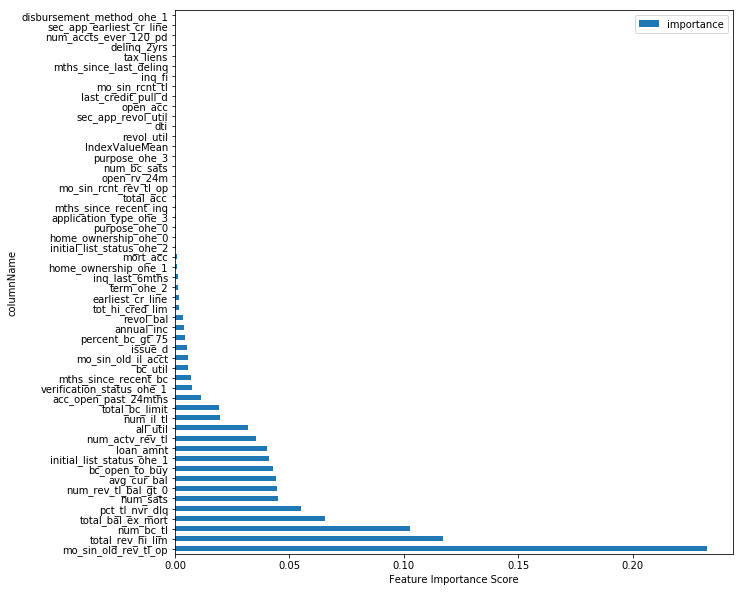

In [28]:
import matplotlib.pyplot as plt
featureImportance.set_index('columnName').plot.barh(figsize=(10,10))#title='Feature Importance', figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

In [29]:
###########LOGISTIC REGRESSION

In [30]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col, when, isnan, trim, count
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import QuantileDiscretizer

In [31]:
from pyspark.ml import Pipeline
logModelStage = LogisticRegression(maxIter = 10, featuresCol = 'features', labelCol = 'funded_ratio_cat', weightCol = 'weightCol')
somestages = [logModelStage]

def calculateResults(trainOrTest, modelTransform):
    aResults = modelTransform.select(['prediction', 'funded_ratio_cat'])
    aPredictionAndLabels = aResults.rdd
    aMetrics = MulticlassMetrics(aPredictionAndLabels)
    aCM = aMetrics.confusionMatrix().toArray()
    anAccuracy = (aCM[0][0] + aCM[1][1])/aCM.sum()
    aPrecision = (aCM[0][0])/(aCM[0][0] + aCM[1][0])
    aRecall = (aCM[0][0])/(aCM[0][0]+aCM[0][1])
    print(trainOrTest,"confusion_matrix\n",aCM)
    print(trainOrTest,"accuracy",anAccuracy)
    print(trainOrTest,"precision",aPrecision)
    print(trainOrTest,"recall",aRecall)
    print(trainOrTest,"F1",(aPrecision*aRecall)/(aPrecision+aRecall)*2)

aPipeline = Pipeline(stages=somestages)

In [32]:
#Prep unbalanced data train and test
dataLog = data
dataLog = dataLog.na.fill(0)
cols = dataLog.columns
cols.remove("funded_ratio")
cols.remove("issue_year")
#import vector assembler
assembler = VectorAssembler(inputCols=cols,outputCol="features")
#transform data
dataLog = assembler.transform(dataLog)
# bucket dependent variable
discretizer = QuantileDiscretizer(numBuckets = 2, inputCol = "funded_ratio", outputCol = "funded_ratio_cat")
dataLog = discretizer.fit(dataLog).transform(dataLog)
#add dummy weight column
dataLog = dataLog.withColumn('weightCol', when(col("funded_ratio_cat")>=0, 1).otherwise(1))
# split data into train and test
train, test = dataLog.randomSplit([.8,.2],seed = 1234)


In [33]:
aPipelineFit = aPipeline.fit(train)
aPipelineResult = aPipelineFit.transform(train)
calculateResults("Train", aPipelineResult)
aPipelineResult = aPipelineFit.transform(test)
calculateResults("Test", aPipelineResult)


Train confusion_matrix
 [[  11202.   98853.]
 [  10477. 1523476.]]
Train accuracy 0.933497890521214
Train precision 0.5167212509802113
Train recall 0.10178547090091318
Train F1 0.17006998952434452
Test confusion_matrix
 [[  2825.  24440.]
 [  2627. 381363.]]
Test accuracy 0.9341843868159657
Test precision 0.5181584739545121
Test recall 0.10361269026224097
Test F1 0.17269309533270166


In [34]:
#Prep balanced data train and test
dataLogBal = data
dataLogBal = dataLogBal.na.fill(0)
cols = dataLogBal.columns
cols.remove("funded_ratio")
cols.remove("issue_year")
#import vector assembler
assembler = VectorAssembler(inputCols=cols,outputCol="features")
#transform data
dataLogBal = assembler.transform(dataLogBal)
# bucket dependent variable
discretizer = QuantileDiscretizer(numBuckets = 2, inputCol = "funded_ratio", outputCol = "funded_ratio_cat")
dataLogBal = discretizer.fit(dataLogBal).transform(dataLogBal)
print(dataLogBal.groupby("funded_ratio_cat").count().toPandas())
#weight needs to be increased on rows where funded_ratio_category = 0
#Each row needs a weight of:
fill = 1917943/137320
dataLogBal = dataLogBal.withColumn('weightCol', when(col("funded_ratio_cat")==0, fill).otherwise(1))
# split data into train and test
train, test = dataLogBal.randomSplit([.8,.2],seed = 1234)

   funded_ratio_cat    count
0               0.0   137320
1               1.0  1917943


In [35]:
aPipelineFit = aPipeline.fit(train)
aPipelineResult = aPipelineFit.transform(train)
calculateResults("Train", aPipelineResult)
aPipelineResult = aPipelineFit.transform(test)
calculateResults("Test", aPipelineResult)


Train confusion_matrix
 [[  99218.   10837.]
 [ 414268. 1119685.]]
Train accuracy 0.7414215745908779
Train precision 0.1932243527574267
Train recall 0.9015310526554904
Train F1 0.31824050062465814
Test confusion_matrix
 [[ 24567.   2698.]
 [103739. 280251.]]
Test accuracy 0.7411897727687201
Test precision 0.1914719498698424
Test recall 0.9010452961672474
Test F1 0.31583007115722084


In [36]:
#Prep balanced data train and test
dataLogBal = data
dataLogBal = dataLogBal.withColumn("issue_year", dataLogBal["issue_year"].cast("integer"))
dataLogBal = dataLogBal.na.fill(0)

dataLogBal2008_2009 = dataLogBal.filter(dataLogBal.issue_year >= 2008).filter(dataLogBal.issue_year <= 2009)
dataLogBal2010_2012 = dataLogBal.filter(dataLogBal.issue_year >= 2010).filter(dataLogBal.issue_year <= 2012)
dataLogBal2013_2015 = dataLogBal.filter(dataLogBal.issue_year >= 2013).filter(dataLogBal.issue_year <= 2015)
dataLogBal2016_2018 = dataLogBal.filter(dataLogBal.issue_year >= 2016).filter(dataLogBal.issue_year <= 2018)

def prepDataLogBal(aDataSet):
    cols = aDataSet.columns
    cols.remove("funded_ratio")
    cols.remove("issue_year")
    #import vector assembler
    assembler = VectorAssembler(inputCols=cols,outputCol="features")
    #transform data
    aDataSet = assembler.transform(aDataSet)
    # bucket dependent variable
    discretizer = QuantileDiscretizer(numBuckets = 2, inputCol = "funded_ratio", outputCol = "funded_ratio_cat")
    aDataSet = discretizer.fit(aDataSet).transform(aDataSet)
    aRatio = aDataSet.groupby("funded_ratio_cat").count().toPandas()
    aRatio = spark.createDataFrame(data = aRatio, schema = ['cat', 'count'])
    zeroCount = aRatio.select('count').filter(aRatio.cat==0).head()[0]
    oneCount = aRatio.select('count').filter(aRatio.cat==1).head()[0]
    aRatio = oneCount/zeroCount
    #weight needs to be increased on rows where funded_ratio_category = 0
    #Each row needs a weight of:
    fill = aRatio
    aDataSet = aDataSet.withColumn('weightCol', when(col("funded_ratio_cat")==0, fill).otherwise(1))
    # split data into train and test
    train, test = aDataSet.randomSplit([.8,.2],seed = 1234)
    return train, test


In [37]:
train, test = prepDataLogBal(dataLogBal2008_2009)
aPipelineFit = aPipeline.fit(train)
aPipelineResult = aPipelineFit.transform(train)
calculateResults("Train", aPipelineResult)
aPipelineResult = aPipelineFit.transform(test)
calculateResults("Test", aPipelineResult)


Train confusion_matrix
 [[2.704e+03 1.000e+00]
 [2.656e+03 1.000e+00]]
Train accuracy 0.5044759418127565
Train precision 0.5044776119402985
Train recall 0.999630314232902
Train F1 0.6705517668939863
Test confusion_matrix
 [[640.   0.]
 [689.   0.]]
Test accuracy 0.4815650865312265
Test precision 0.4815650865312265
Test recall 1.0
Test F1 0.6500761808024378


In [38]:
train, test = prepDataLogBal(dataLogBal2010_2012)
aPipelineFit = aPipeline.fit(train)
aPipelineResult = aPipelineFit.transform(train)
calculateResults("Train", aPipelineResult)
aPipelineResult = aPipelineFit.transform(test)
calculateResults("Test", aPipelineResult)


Train confusion_matrix
 [[12302.  5540.]
 [14269. 30951.]]
Train accuracy 0.6858805619866164
Train precision 0.4629859621391743
Train recall 0.6894966931958301
Train F1 0.5539819422241236
Test confusion_matrix
 [[3030. 1427.]
 [3539. 7644.]]
Test accuracy 0.6824808184143223
Test precision 0.461257421220886
Test recall 0.6798294817141575
Test F1 0.5496100126972611


In [39]:
train, test = prepDataLogBal(dataLogBal2013_2015)
aPipelineFit = aPipeline.fit(train)
aPipelineResult = aPipelineFit.transform(train)
calculateResults("Train", aPipelineResult)
aPipelineResult = aPipelineFit.transform(test)
calculateResults("Test", aPipelineResult)


Train confusion_matrix
 [[ 42283.   8088.]
 [180164. 347416.]]
Train accuracy 0.6742768850646508
Train precision 0.19008123283298944
Train recall 0.83943141887197
Train F1 0.30997221590950746
Test confusion_matrix
 [[10517.  1962.]
 [45174. 86394.]]
Test accuracy 0.6727734697702833
Test precision 0.18884559444075344
Test recall 0.842775863450597
Test F1 0.3085521490391668


In [40]:
train, test = prepDataLogBal(dataLogBal2016_2018)
aPipelineFit = aPipeline.fit(train)
aPipelineResult = aPipelineFit.transform(train)
calculateResults("Train", aPipelineResult)
aPipelineResult = aPipelineFit.transform(test)
calculateResults("Test", aPipelineResult)


Train confusion_matrix
 [[ 33368.   3468.]
 [162352. 799028.]]
Train accuracy 0.8338836484287969
Train precision 0.17048845289188636
Train recall 0.9058529699207297
Train F1 0.2869674401004489
Test confusion_matrix
 [[  8390.    849.]
 [ 40418. 199516.]]
Test accuracy 0.8343841427441978
Test precision 0.17189804950008195
Test recall 0.9081069379803008
Test F1 0.28907609351043123


In [43]:
def importantFeatures(aDataSet):
    train, test = prepDataLogBal(aDataSet)
    rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'funded_ratio_cat')
    aFit = rf.fit(train)
    aResult = aFit.transform(train)
    attrs = sorted(
        (attr["idx"], attr["name"]) for attr in (chain(*aResult
            .schema["features"]
            .metadata["ml_attr"]["attrs"].values())))
    featureImportance = [(name, aFit.featureImportances[idx])
     for idx, name in attrs
     if aFit.featureImportances[idx]]
    featureImportance = pd.DataFrame.from_records(featureImportance, columns=['columnName','importance'])
    featureImportance.sort_values(by='importance', ascending=False, inplace=True)
    return featureImportance

In [44]:
importantFeatures(dataLogBal2008_2009)

,columnName,importance
3,issue_d,0.621710
15,last_credit_pull_d,0.096050
0,loan_amnt,0.053979
4,dti,0.031436
12,revol_bal,0.026343
8,mths_since_last_delinq,0.020840
7,inq_last_6mths,0.018905
21,home_ownership_ohe_2,0.015802
10,open_acc,0.014793
6,earliest_cr_line,0.014132


In [45]:
importantFeatures(dataLogBal2010_2012)

,columnName,importance
0,loan_amnt,0.230505
43,total_bal_ex_mort,0.108479
44,total_bc_limit,0.095582
3,issue_d,0.092751
46,term_ohe_2,0.087974
19,bc_open_to_buy,0.086424
17,acc_open_past_24mths,0.041790
23,mo_sin_old_rev_tl_op,0.040332
39,percent_bc_gt_75,0.035518
26,mths_since_recent_bc,0.025816


In [46]:
importantFeatures(dataLogBal2013_2015)

,columnName,importance
53,initial_list_status_ohe_1,0.304077
0,loan_amnt,0.158071
54,initial_list_status_ohe_2,0.137467
1,issue_d,0.070441
41,term_ohe_2,0.063124
12,tot_cur_bal,0.039251
47,purpose_ohe_3,0.034763
39,total_bc_limit,0.034378
44,verification_status_ohe_2,0.030718
6,pub_rec,0.030117


In [47]:
importantFeatures(dataLogBal2016_2018)

,columnName,importance
39,initial_list_status_ohe_1,0.327112
40,initial_list_status_ohe_2,0.146943
35,term_ohe_2,0.140692
3,dti,0.054901
14,open_rv_24m,0.042011
0,loan_amnt,0.040803
26,num_actv_rev_tl,0.038486
8,last_credit_pull_d,0.029470
20,bc_util,0.027409
5,inq_last_6mths,0.022296
